In [4]:
import os
import image_processing
import cupy as cp

In [2]:
file_path = "data/lidar/Job1051007_34077_04_88.laz"

min_x_extent = 712160
max_x_extent = 712230
min_y_extent = 33100
max_y_extent = 33170

grid_gen = image_processing.GridGenerator(
    file_path, min_x_extent, max_x_extent, min_y_extent, max_y_extent
)

resolution = 0.05  # meters

pts_array = grid_gen.create_point_array()
grid_x, grid_y, grid_z = grid_gen.gen_grid(resolution, z=pts_array)

Directory to store grids created: generated_grids


KeyboardInterrupt: 

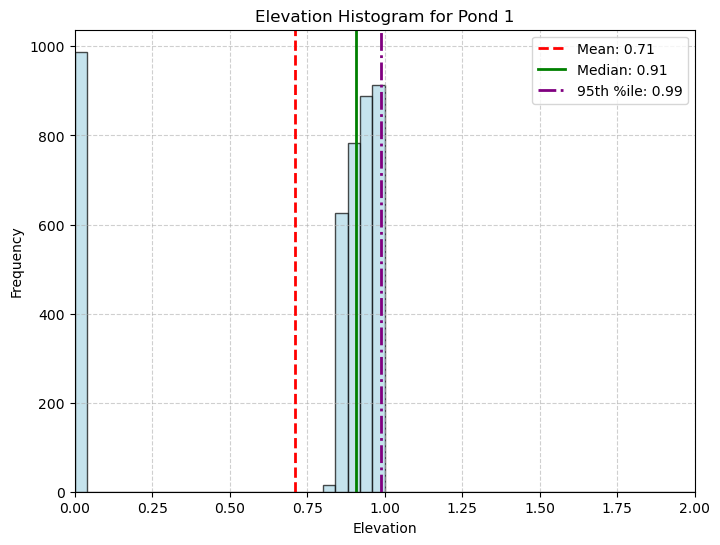

In [7]:
grid_z_gpu = cp.asarray(grid_z)

mapper = image_processing.DepthMapper(grid_z_gpu)

subfolder_path = 'data/CB_03_20220909212130_20220910054130'
labels_rects_zarr_folder = os.path.join(subfolder_path, "zarr", "labels_rects")

# Check if the labels_rects folder exists
if os.path.exists(labels_rects_zarr_folder):
    # print(f"Processing folder {subfolder}.")
    depth_map_zarr_save_dir = os.path.join(
        subfolder_path, "zarr", "depth_maps_updated"
    )
    pond_edge_elev_plot_dir = os.path.join(subfolder_path, 'plots', 'edge_histograms')
    mapper.process_depth_maps(labels_rects_zarr_folder, depth_map_zarr_save_dir, pond_edge_elev_plot_dir)